# Multilinear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r'C:\Users\Ujvala\Downloads\50_Startups.csv')

In [3]:
dataset.isnull().any()

R&D Spend          False
Administration      True
Marketing Spend     True
State              False
Profit             False
dtype: bool

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset['Administration'].fillna(dataset['Administration'].mean(),inplace=True)
dataset['Marketing Spend'].fillna(dataset['Marketing Spend'].mean(),inplace=True)

In [6]:
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [7]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121564.038163,212725.266735,112012.639200
std,45902.256482,27974.818762,121697.951409,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,135028.207500,90138.902500
50%,73051.080000,122699.795000,213680.038367,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<Axes: >

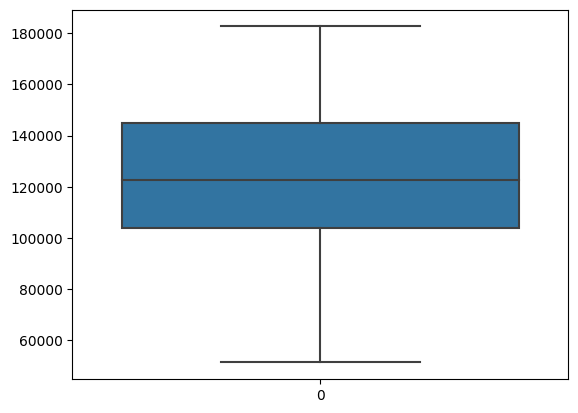

In [8]:
import seaborn as sns
sns.boxplot(dataset['Administration'])

In [9]:
x=dataset.iloc[:,0:4].values
y=dataset.iloc[:,4:5].values

In [10]:
x[0]

array([165349.2, 136897.8, 471784.1, 'New York'], dtype=object)

In [11]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [12]:
x.shape

(50, 4)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [14]:
ct=ColumnTransformer([('oh',OneHotEncoder(),[3])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 212725.2667346939],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 121564.03816326532, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94

In [15]:
x.shape

(50, 6)

In [16]:
import joblib
joblib.dump(ct,'column')

['column']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
multilinear = LinearRegression()
multilinear.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = multilinear.predict(x_test)

In [20]:
y_pred

array([[102878.00591902],
       [132270.25447716],
       [132633.7314001 ],
       [ 72126.02121901],
       [178331.50603371],
       [116426.5749305 ],
       [ 68171.67631538],
       [ 98737.3884056 ],
       [114057.16028012],
       [167719.48557511]])

In [21]:
y_test

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94]])

In [22]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)

In [23]:
accuracy

0.934450889850444

In [24]:
x[0]

array([0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1], dtype=object)

Newyork California Florida
0           1        0
0           0         1
1           0         0

In [25]:
yp=multilinear.predict([[1,0,0,12345,12345,3456]])

In [27]:
yp

array([[52470.96807741]])

In [28]:
new = joblib.load('column')

In [29]:
[{1645,2567,6787,'New york'}]

[{1645, 2567, 6787, 'New york'}]

In [34]:
p = new.transform([[1645,2567,6787,'California']])

In [35]:
p

array([[1.0, 0.0, 0.0, 1645, 2567, 6787]], dtype=object)

In [36]:
y1 = multilinear.predict(p)

In [37]:
y1


array([[44060.68184156]])

for suppose if you have cateforical values in your data set that got binarised
1.load the column transformer
cover your input with column transformer
send the converted values to predict function to see prediction of proof

In [39]:
y2=multilinear.predict(new.transform([[12345,56789,12345,'California']]))

In [40]:
y2

array([[54267.44556095]])

In [41]:
y3 = multilinear.predict(new.transform([[1234567,4568987,2345,'New York']]))

In [42]:
y3

array([[1141417.50251309]])

NameError: name 'sklearn' is not defined

In [44]:
import sklearn


In [45]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_loss',
 'base',
 'clone',
 'compose',
 'config_context',
 'exceptions',
 'externals',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'os',
 'pipeline',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'utils']

In [47]:
from sklearn import preprocessing

In [48]:
dir(preprocessing)

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'PolynomialFeatures',
 'PowerTransformer',
 'QuantileTransformer',
 'RobustScaler',
 'SplineTransformer',
 'StandardScaler',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_csr_polynomial_expansion',
 '_data',
 '_discretization',
 '_encoders',
 '_function_transformer',
 '_label',
 '_polynomial',
 'add_dummy_feature',
 'binarize',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'power_transform',
 'quantile_transform',
 'robust_scale',
 'scale']